# 4.4 - CNN Architectures

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

/content/init.py:2: SyntaxWarning: invalid escape sequence '\S'
  course_id = '\S*deeplearning\S*'


replicating local resources


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

'2.19.0'

see

- [ImageNet](http://www.image-net.org/)

- [ImageNet - Large Scale Visual Recognition Challenge (ILSVRC)](http://www.image-net.org/challenges/LSVRC/)

----


- [A Survey of the Recent Architectures of Deep Convolutional Neural Networks](https://arxiv.org/pdf/1901.06032.pdf)

- [Benchmark Analysis of Representative Deep Neural Network Architectures](https://www.researchgate.net/publication/328509150_Benchmark_Analysis_of_Representative_Deep_Neural_Network_Architectures)


----

- [Illustrated: 10 CNN Architectures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)

- [Difference between AlexNet, VGGNet, ResNet, and Inception](https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96)

- [An Intuitive Guide to Deep Network Architectures](https://towardsdatascience.com/an-intuitive-guide-to-deep-network-architectures-65fdc477db41)

In [3]:
vgg16 = tf.keras.applications.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Get some random image and transform it. We need the correct shape and pixel values

In [5]:
img_url = 'https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/gallery_slide/public/images/car-reviews/first-drives/legacy/rrswbphev006.jpg?itok=9I7wPblq'

In [6]:
from skimage.io import imread
from skimage.transform import resize

(1, 224, 224, 3) 0 255


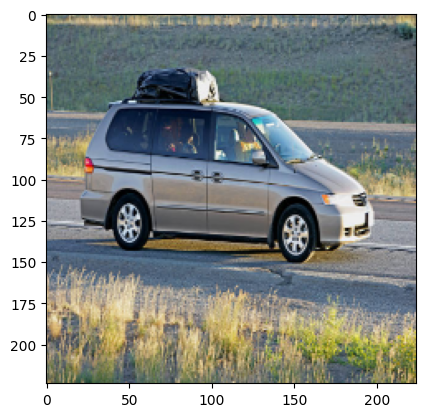

In [28]:
def get_img(img_fname):
    img = imread(img_fname)
    simg = resize(img, output_shape=(224,224,3))
    simg = ((simg-np.min(simg))/(np.max(simg)-np.min(simg))*255).astype(int)
    simg = simg.reshape([1,*simg.shape])
    return simg


simg = get_img('local/imgs/car.jpg')
print(simg.shape, np.min(simg), np.max(simg))
plt.imshow(simg[0])

make and decode prediction

In [15]:
output = vgg16.predict(simg)
output.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


(1, 1000)

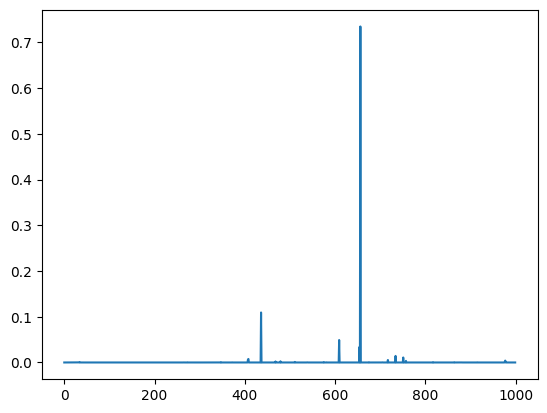

In [16]:
plt.plot(output[0])

In [17]:
np.argsort(output[0])[::-1][:5]

array([656, 436, 609, 654, 734])

In [18]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [19]:
decode_predictions(output)

[[('n03770679', 'minivan', np.float32(0.7349299)),
  ('n02814533', 'beach_wagon', np.float32(0.109361306)),
  ('n03594945', 'jeep', np.float32(0.04911455)),
  ('n03769881', 'minibus', np.float32(0.033921164)),
  ('n03977966', 'police_van', np.float32(0.014368715))]]

we can also use it as a feature extractor

In [21]:
inputs = vgg16.layers[0]
layer = vgg16.get_layer('fc1')

layer_output_fn = tf.keras.Model(vgg16.inputs, layer.output)

In [22]:
layer_output_fn(simg)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


<tf.Tensor: shape=(1, 4096), dtype=float32, numpy=
array([[ 0.      ,  0.      ,  0.      , ..., 21.892479,  0.      ,
         0.      ]], dtype=float32)>

and do other stuff (train other models, compare, etc.)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

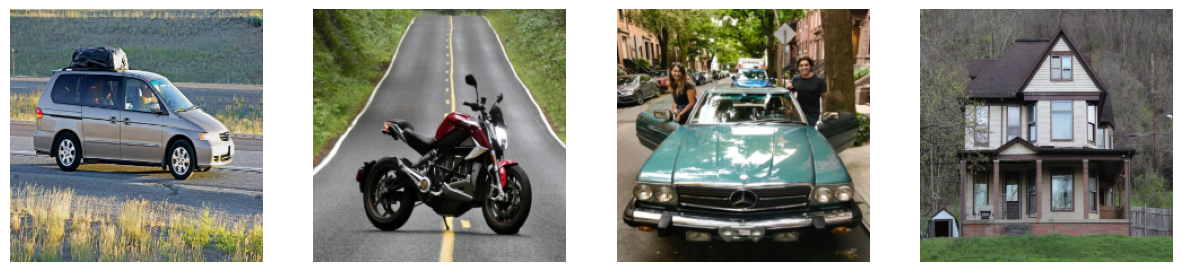

In [29]:
simg2 = get_img('local/imgs/motorbike.jpg')
simg3 = get_img('local/imgs/citycar.jpg')
simg4 = get_img('local/imgs/bellaire-house.jpg')
plt.figure(figsize=(15,6))
plt.subplot(141); plt.imshow(simg[0]); plt.axis("off")
plt.subplot(142); plt.imshow(simg2[0]); plt.axis("off")
plt.subplot(143); plt.imshow(simg3[0]); plt.axis("off")
plt.subplot(144); plt.imshow(simg4[0]); plt.axis("off")

In [30]:
feats = layer_output_fn(np.vstack((simg,simg2,simg3,simg4))).numpy()
feats.shape

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(4, 224, 224, 3))
  warnings.warn(msg)


(4, 4096)

In [31]:
import itertools
r = np.zeros((len(feats), len(feats)))
for i,j in itertools.product(range(len(feats)), range(len(feats))):
    r[i,j] = np.mean(np.abs(feats[i]-feats[j]))
r

array([[0.        , 2.55644989, 2.53840065, 2.27824593],
       [2.55644989, 0.        , 3.00784516, 2.43986821],
       [2.53840065, 3.00784516, 0.        , 2.7770021 ],
       [2.27824593, 2.43986821, 2.7770021 , 0.        ]])

and, of course, the imagenet classification

In [32]:
preds = vgg16.predict(np.vstack((simg,simg2,simg3,simg4)))
decode_predictions(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n03770679', 'minivan', np.float32(0.7349284)),
  ('n02814533', 'beach_wagon', np.float32(0.109362334)),
  ('n03594945', 'jeep', np.float32(0.04911469)),
  ('n03769881', 'minibus', np.float32(0.03392129)),
  ('n03977966', 'police_van', np.float32(0.014368754))],
 [('n04482393', 'tricycle', np.float32(0.4998707)),
  ('n03791053', 'motor_scooter', np.float32(0.11783641)),
  ('n03785016', 'moped', np.float32(0.06644621)),
  ('n03534580', 'hoopskirt', np.float32(0.04639038)),
  ('n02769748', 'backpack', np.float32(0.042827234))],
 [('n02930766', 'cab', np.float32(0.64287394)),
  ('n04252077', 'snowmobile', np.float32(0.046685826)),
  ('n03459775', 'grille', np.float32(0.044866074)),
  ('n03445924', 'golfcart', np.float32(0.040118206)),
  ('n02701002', 'ambulance', np.float32(0.03328232))],
 [('n02859443', 'boathouse', np.float32(0.40657878)),
  ('n02825657', 'bell_cote', np.float32(0.17474882)),
  ('n03028079', 'church', np.float32(0.08881704)),
  ('n03930313', 'picket_fence', np.float3



## Tensorflow Hub

[https://www.tensorflow.org/hub](https://www.tensorflow.org/hub)